In [2]:
import pandas as pd
import seaborn as sns

# Visualizing Data with Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) is a powerful data visualization library for plotting statistical graphs. It is far more capable than Leather, but that also means that it's easier to get lost. We'll take a look at just a few examples of what we can do with Seaborn, and then you can decide which library you'd like to use for your project.

## Flight Data

For practice, let's look at our good friend the flight data.

In [3]:
flights = pd.read_csv('flights_small.csv')
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,B6,469,N183JB,BOS,FLL,1915,...,2230.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,MQ,2853,N906MQ,GSO,DFW,730,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,10,6,DL,1631,N710TW,SLC,LAX,1500,...,1553.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,10,6,MQ,3072,N856MQ,COU,DFW,1437,...,1643.0,18.0,0,0,NaN,8.0,0.0,0.0,10.0,0.0
4,2015,1,10,6,MQ,3222,N902MQ,MSN,DFW,1112,...,1339.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015,9,9,3,AA,47,N3LYAA,PDX,ORD,1312,...,1853.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
996,2015,9,9,3,DL,2389,N3736C,SLC,PDX,1659,...,1741.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
997,2015,9,9,3,EV,4584,N12563,ICT,IAH,1513,...,1648.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
998,2015,9,9,3,OO,5322,N909SW,ORD,FWA,1910,...,2128.0,22.0,0,0,NaN,19.0,0.0,0.0,3.0,0.0


### Number of Flights: Bar Plot

Last time, you took this data and used Leather to make a columns chart showing the total number of flights from each airline. Let's do the same thing with [Seaborn](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) (but this time, it's called a `barplot`).

In [8]:
# Group data by airline, and count up total flights per group
airlines = flights.groupby('AIRLINE')
counts = airlines['FLIGHT_NUMBER'].count()
counts

AIRLINE
AA    125
AS     29
B6     38
DL    161
EV    105
F9     23
HA     12
MQ     46
NK     21
OO    114
UA     78
US     37
VX      7
WN    204
Name: FLIGHT_NUMBER, dtype: int64

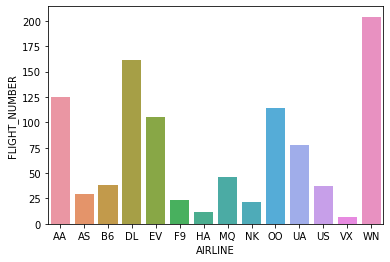

In [11]:
# Turn this data into a bar plot, using the index as the categories (x-axis) and the values as the y-axis
sns.barplot(x=counts.index, y=counts)

### Average Delay: Box-and-Whisker Plot

Now, let's compare the average delay for each airline. One of the best ways to do this is using a [box-and-whisker plot](https://datavizcatalogue.com/methods/box_plot.html). [Seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) calls this a `boxplot`.

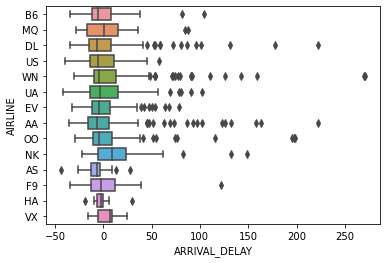

In [14]:
# Turn the data into a box plot, using the airlines as y-axis categories and the delays as the x-axis
sns.boxplot(x=flights['ARRIVAL_DELAY'], y=flights['AIRLINE'])

Note that this boxplot does not require the use of GroupBy. Seaborn is smart enough to figure out to group all of the airlines together simply by the fact that we specified the `AIRLINE` column as the y-axis.

In addition to the default box plot, we can specify several optional parameters. Here's a version where we remove the outliers.

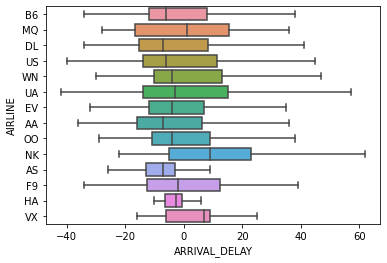

In [15]:
# Same thing, but don't display outliers
sns.boxplot(x=flights['ARRIVAL_DELAY'], y=flights['AIRLINE'], showfliers=False)

Here's a version where we remove the outliers and sort the airlines alphabetically.

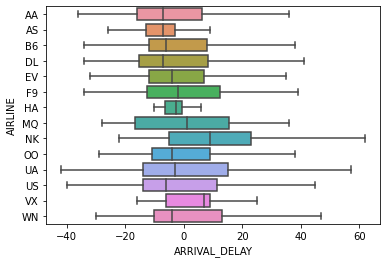

In [27]:
# Same thing, but don't display outliers AND sort the airlines
sns.boxplot(x=flights['ARRIVAL_DELAY'], y=flights['AIRLINE'], showfliers=False, order=airlines.groups.keys())